In [173]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller, kpss
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [174]:
df = pd.read_csv('basket_prices_19_24.csv')

In [175]:
df['Місяць'] = pd.to_datetime(df['Місяць'], format='%Y-M%m')

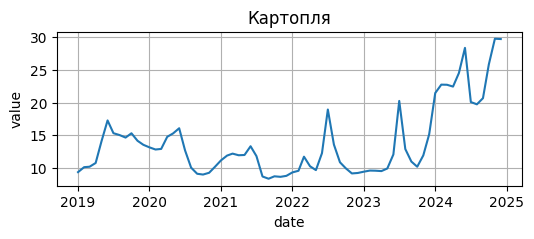

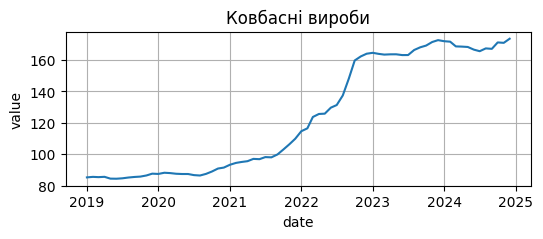

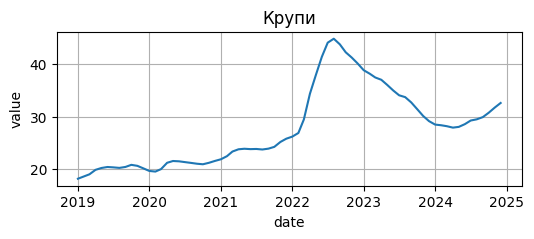

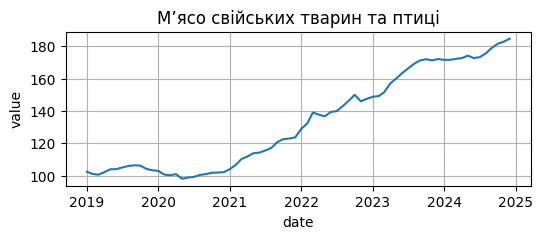

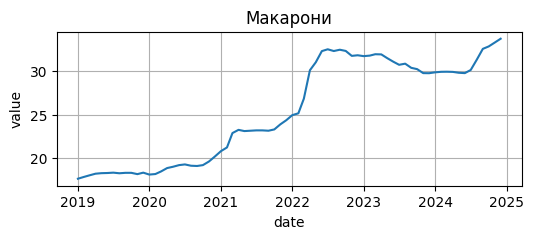

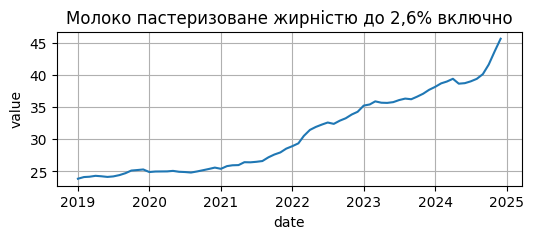

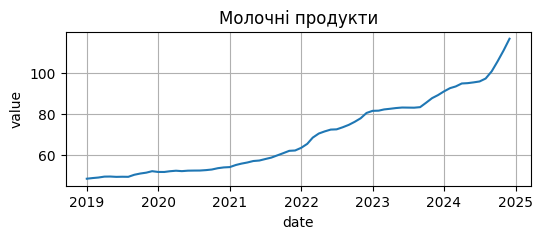

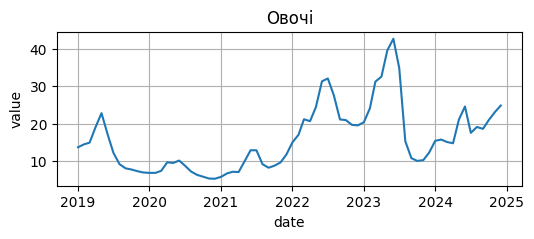

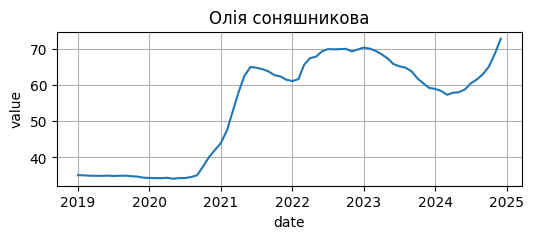

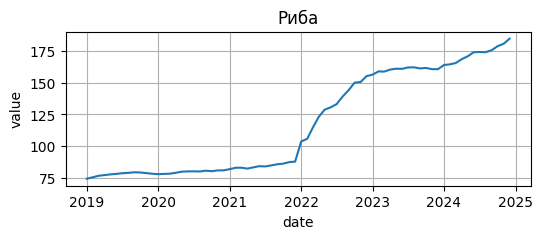

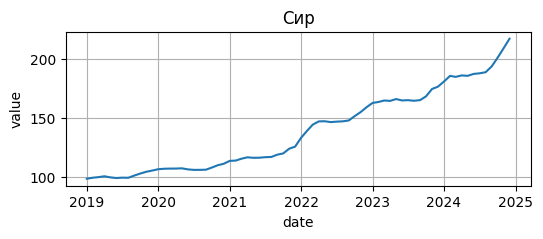

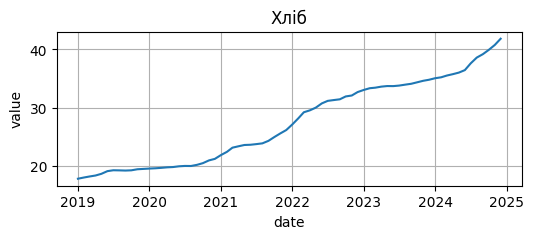

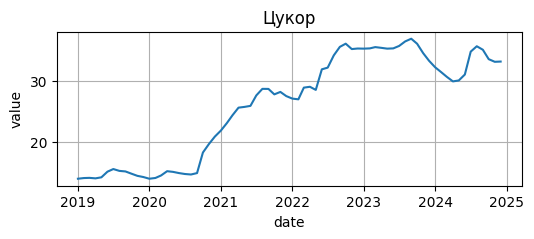

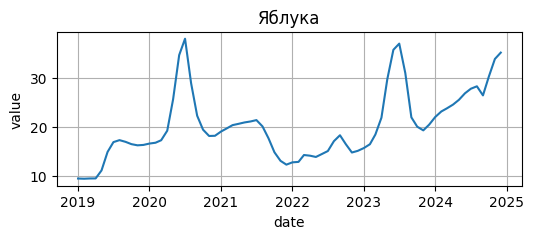

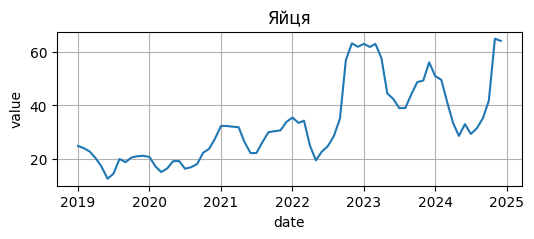

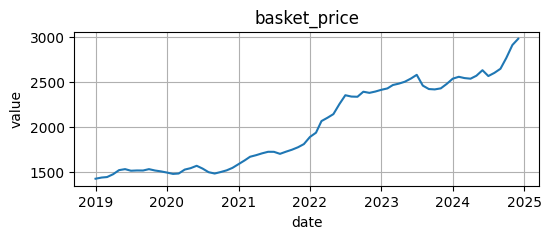

In [176]:
def plot_all_var(ls: list):
    for column in ls:
        plt.figure(figsize=(6, 2))
        plt.plot(df['Місяць'], df[column])
        plt.title(column)
        plt.xlabel('date')
        plt.ylabel('value')
        plt.grid(True)

plot_all_var(list(df.columns)[1:])


In [177]:
df.shape

(72, 17)

In [178]:

def first_diff(ls: list):
    for column in ls:
        df[f'first_diff_{column}'] = df[column].diff()
first_diff(list(df.columns)[1:-1])


In [179]:
def test_stationarity(series, name="Series"):
    series_clean = series.replace([np.inf, -np.inf], np.nan).dropna()
    print(f"\n===={name.upper()}====")
    result_adf = adfuller(series_clean)
    print("ADF-test:")
    print(f"Test statistic: {result_adf[0]}")
    print(f"p-value: {result_adf[1]}")
    print(f"{'stationary' if result_adf[1] < 0.05 else 'non-stationary'}")

    try:
        result_kpss = kpss(series_clean, regression='c', nlags="auto")
        print("\nKPSS-test:")
        print(f"Test statistic: {result_kpss[0]}")
        print(f"p-value: {result_kpss[1]}")
        print(f"{'stationary' if result_kpss[1] > 0.05 else 'non-stationary'}")
    except Exception as e:
        print(f"KPSS test failed: {e}")

In [180]:
for i, col in enumerate(list(df.columns)[17:]):
   test_stationarity(df[col], col)


====FIRST_DIFF_КАРТОПЛЯ====
ADF-test:
Test statistic: -6.242465156526384
p-value: 4.661186970024785e-08
stationary

KPSS-test:
Test statistic: 0.20341601187134564
p-value: 0.1
stationary

====FIRST_DIFF_КОВБАСНІ ВИРОБИ====
ADF-test:
Test statistic: -4.2196889078871385
p-value: 0.0006101197815934728
stationary

KPSS-test:
Test statistic: 0.21159690715221327
p-value: 0.1
stationary

====FIRST_DIFF_КРУПИ====
ADF-test:
Test statistic: -3.4022167084415322
p-value: 0.010883535889303379
stationary

KPSS-test:
Test statistic: 0.11505057481969397
p-value: 0.1
stationary

====FIRST_DIFF_МʼЯСО СВІЙСЬКИХ ТВАРИН ТА ПТИЦІ====
ADF-test:
Test statistic: -6.017652036114782
p-value: 1.5200989549341812e-07
stationary

KPSS-test:
Test statistic: 0.452662471302679
p-value: 0.05445583133505216
stationary

====FIRST_DIFF_МАКАРОНИ====
ADF-test:
Test statistic: -4.382491660563408
p-value: 0.0003187419170189954
stationary

KPSS-test:
Test statistic: 0.0940838841233607
p-value: 0.1
stationary

====FIRST_DIFF_МО

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_66315/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_66315/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_66315/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipyker

нестаціонарні: молоко, молочні продукти, овочі, олія, сир, хліб

'Молоко пастеризоване жирністю до 2,6% включно'

'Молочні продукти'

'Овочі'

'Олія соняшникова'

'Хліб'

'Сир'



In [181]:
df_detrend = pd.read_csv('basket_prices_19_24.csv')
df_detrend['t'] = np.arange(len(df))

In [182]:
def lin_trend(df, column):
    x_lin = df[['t']]
    y = df[column]
    model_lin = LinearRegression().fit(x_lin, y)
    df[f'trend_linear_{column}'] = model_lin.predict(x_lin)
    return df[f'trend_linear_{column}'] 
lin_trend_milk = lin_trend(df_detrend, 'Молоко пастеризоване жирністю до 2,6% включно')

In [183]:
def quadratic_trend(df, column):
    x_quad = np.column_stack((df['t'], df['t']**2))
    y = df[column]
    model_quad = LinearRegression().fit(x_quad, y)
    df[f'trend_quadratic_{column}'] = model_quad.predict(x_quad)
    return df[f'trend_quadratic_{column}']
    
quadratic_trend_milk = quadratic_trend(df_detrend, 'Молоко пастеризоване жирністю до 2,6% включно')

In [184]:
def expo_trend(df, column):
    x_lin = df[['t']]
    df[f'log_{column}'] = np.log(df[column])
    model_exp = LinearRegression().fit(x_lin, df[f'log_{column}'])
    df[f'trend_exponential_{column}'] = np.exp(model_exp.predict(x_lin))
    return df[f'trend_exponential_{column}']
    
expo_trend_milk = expo_trend(df_detrend, 'Молоко пастеризоване жирністю до 2,6% включно')

In [185]:
df['detrended_linear_milk'] = df['Молоко пастеризоване жирністю до 2,6% включно'] - lin_trend_milk
df['detrended_quadratic_milk'] = df['Молоко пастеризоване жирністю до 2,6% включно'] - quadratic_trend_milk
df['detrended_exponential_milk'] = df['Молоко пастеризоване жирністю до 2,6% включно'] / expo_trend_milk

In [186]:
for i, col in enumerate(['detrended_linear_milk', 'detrended_quadratic_milk', 'detrended_exponential_milk']):
   test_stationarity(df[col], col)


====DETRENDED_LINEAR_MILK====
ADF-test:
Test statistic: -0.8413803908647447
p-value: 0.8066637696157974
non-stationary

KPSS-test:
Test statistic: 0.27308867991354924
p-value: 0.1
stationary

====DETRENDED_QUADRATIC_MILK====
ADF-test:
Test statistic: -3.109022788235618
p-value: 0.025892627578770144
stationary

KPSS-test:
Test statistic: 0.11661954024760746
p-value: 0.1
stationary

====DETRENDED_EXPONENTIAL_MILK====
ADF-test:
Test statistic: -1.5221689222803894
p-value: 0.5225175813436171
non-stationary

KPSS-test:
Test statistic: 0.2326747359123892
p-value: 0.1
stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_66315/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_66315/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_66315/3535282707.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series_clean, regression='c', nlags="auto")
